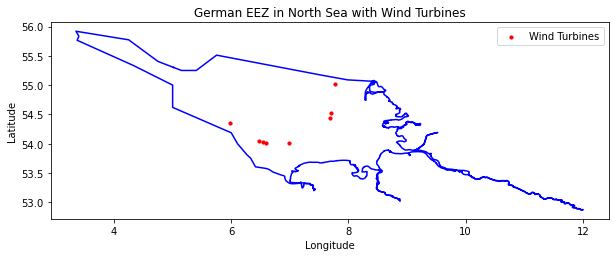

In [3]:
import shapefile
import matplotlib.pyplot as plt
from shapely.geometry import shape, Point
import pandas as pd
import geopandas as gpd

# Define the path to the shapefile components and the wind turbine dataset
shapefile_path = "eez_iho.shp"
shapefile_shx_path = "eez_iho.shx"
shapefile_dbf_path = "eez_iho.dbf"
wind_farms_path = "wind_turbines_sample.csv"  # Path to your wind turbines dataset

# Read the shapefile using the pyshp library
sf = shapefile.Reader(shapefile_path)

# Extract relevant geometries for the German EEZ in the North Sea
german_eez_geometries = []
for sr in sf.shapeRecords():
    record = sr.record.as_dict()
    if record['eez'] == 'German Exclusive Economic Zone' and record['territory1'] == 'Germany':
        geom = shape(sr.shape.__geo_interface__)
        german_eez_geometries.append(geom)

# Load wind farm dataset (assuming it is a CSV file with 'latitude' and 'longitude' columns)
wind_farms_df = pd.read_csv(wind_farms_path)

# Convert the wind farm DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(wind_farms_df['longitude'], wind_farms_df['latitude'])]
wind_farms_gdf = gpd.GeoDataFrame(wind_farms_df, geometry=geometry)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each German EEZ geometry
for geom in german_eez_geometries:
    if geom.geom_type == 'Polygon':
        x, y = geom.exterior.xy
        ax.plot(x, y, color='blue')
    elif geom.geom_type == 'MultiPolygon':
        for part in geom:
            x, y = part.exterior.xy
            ax.plot(x, y, color='blue')

# Plot wind turbine locations
wind_farms_gdf.plot(ax=ax, color='red', markersize=10, label='Wind Turbines')

ax.set_title("German EEZ in North Sea with Wind Turbines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

# Show the plot
plt.show()
